



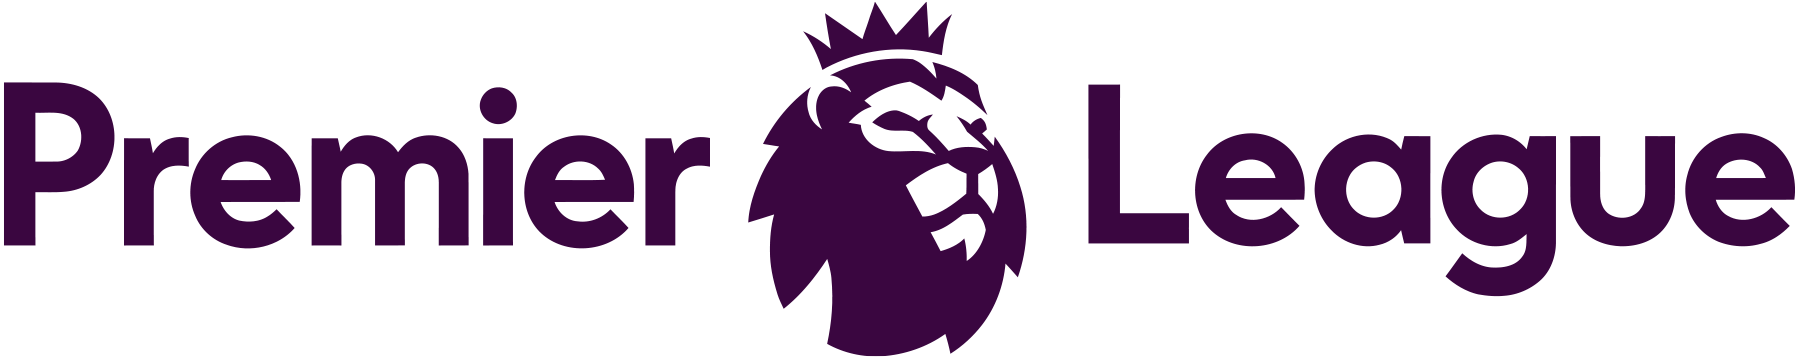



La Premier League, también conocida en Inglaterra como The Premiership, es la máxima categoría del sistema de ligas de fútbol de Inglaterra. Comenzó a disputarse en la temporada 1992-93


El análisis se realiza de la ultima temporada 2020-2021 de la Premier League
La Colección de datos utilizada de la temporada 2020-2021 de la Premier League fueron descargados desde:

https://bit.ly/3aRnGVx



## Análisis de Datos English Premier League (EPL) 2020-2021

In [1]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Cargamos los datos para luego limpiar nuestros datos.

In [2]:
#cargamos un archivo CSV separado por comas
epl = pd.read_csv('EPL_20_21.csv')


In [3]:
#leer 5 primeras lineas

epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [5]:
epl.shape

(532, 18)

In [6]:
len(epl)

532

In [7]:
epl.shape[1]

18

In [9]:
#leer 4 primeras lineas aleatorias

epl.sample(4)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
156,Andriy Yarmolenko,West Ham United,UKR,"FW,MF",30,15,1,375,0,1,157,79.0,0,0,0.10,0.23,3,0
239,Lucas Digne,Everton,FRA,DF,27,30,30,2681,0,7,1690,72.5,0,0,0.02,0.18,2,1
40,Oleksandr Zinchenko,Manchester City,UKR,DF,23,20,15,1478,0,0,1475,90.2,0,0,0.04,0.08,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0


In [10]:
#Información del DataFrame

epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [11]:
#Resumen de Datos estadisticos ---- Solo columnas numéricas

epl.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [13]:
#Número total de valores nulos
epl.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [14]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

Creamos 2 columnas mas Minutos por partido y Goles por partido.

In [15]:
# creacion de 2 columnas
epl['MinsPerMatch'] = (epl['Mins'] / epl['Matches']).astype(int)

epl['GoalsPerMatch'] = (epl['Goals'] / epl['Matches']).astype(float)

In [16]:
#visualizamos las nuevas columnas
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [17]:
epl.shape

(532, 20)

In [18]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinsPerMatch', 'GoalsPerMatch'],
      dtype='object')

In [20]:
#Total de goles ---- temporada EPL 2020-2021 ultima temporada
Total_Goals = epl['Goals'].sum()
Total_Goals

986

In [21]:
#Goles x Penales ---- temporada EPL 2020-2021 ultima temporada
Total_PenaltyGoals = epl['Penalty_Goals'].sum()
Total_PenaltyGoals 

102

In [25]:
# Total Penales ---- temporada EPL 2020-2021 ultima temporada
Total_PenaltyAttempts = epl['Penalty_Attempted'].sum()
Total_PenaltyAttempts

125

### Gráfico Pie chart **Penales Marcados** y **Penales Atajados**.

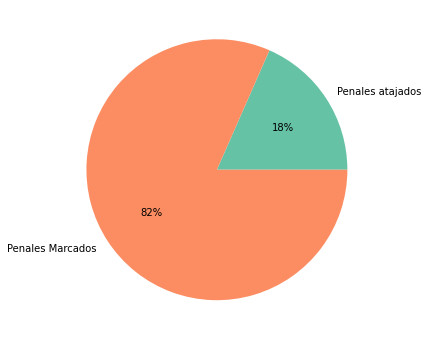

In [30]:
# Gráficos de penales
plt.figure(figsize=(13,6))
pl_not_scored = epl['Penalty_Attempted'].sum() - Total_PenaltyGoals

data = [pl_not_scored, Total_PenaltyGoals]
nom = ["Penales atajados",'Penales Marcados']
colores = sns.color_palette('Set2')
plt.pie(data, labels = nom, colors = colores, autopct = '%.0f%%')
plt.show()

In [31]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinsPerMatch', 'GoalsPerMatch'],
      dtype='object')

In [35]:
# Posiciones únicas de cada jugador 
# Portero (GK), defensor (DF), centrocampista (MF) delantero (FW)
epl['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [34]:
# Filtrar jugadores delanteros (FW)
epl[epl['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [36]:
# Cantidad jugadores delanteros (FW)
epl_fw = epl[epl['Position'] == 'FW']
epl_fw['Name'].count()

81

In [39]:
#  Nacionalidad de los Jugadores
np.size((epl['Nationality'].unique()))

59

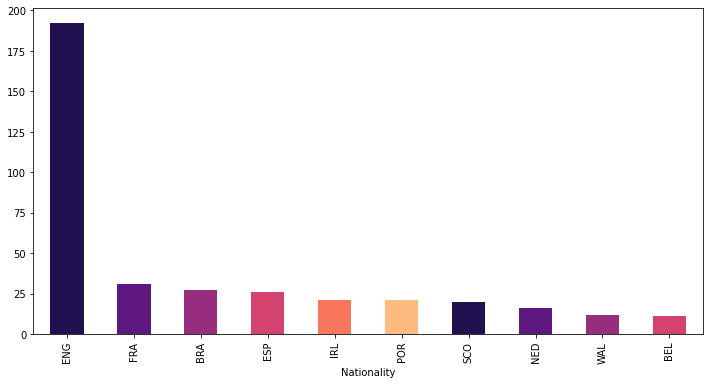

In [45]:
# Nacionalidad de la mayoría de los jugadores
nationality = epl.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6), color = sns.color_palette('magma'))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

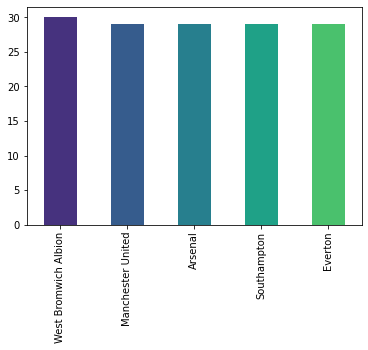

In [46]:
# Los Club con maximo numero de jugadores en la temporada
epl['Club'].value_counts().nlargest(5).plot(kind = 'bar',
                                           color = sns.color_palette('viridis'))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

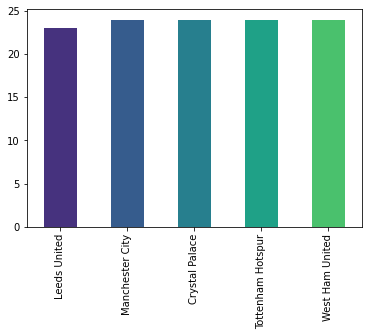

In [47]:
# Los Club con menor numero de jugadores en la temporada
epl['Club'].value_counts().nsmallest(5).plot(kind = 'bar',
                                           color = sns.color_palette('viridis'))
plt.show

### Edad de los jugadores

In [54]:
# Grupo de edades de los Jugadores
Under20 = epl[epl['Age'] <=20]
age20_25 = epl[(epl['Age'] > 20) & (epl['Age'] <=25)]
age25_30 = epl[(epl['Age'] > 25) & (epl['Age'] <=30)]
Above30 = epl[epl['Age'] > 30]

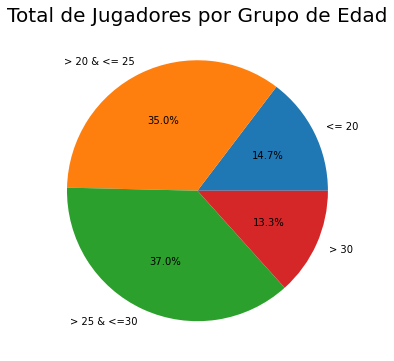

In [55]:
# Pie Chart de los grupos de jugadores por edad

x = np.array([Under20['Name'].count(), age20_25['Name'].count(),
             age25_30['Name'].count(), Above30['Name'].count()])

mylabels = ['<= 20','> 20 & <= 25', '> 25 & <=30', '> 30']

plt.figure(figsize=(13,6))
plt.title('Total de Jugadores por Grupo de Edad', fontsize = 20)
plt.pie(x, labels = mylabels, autopct = '%.1f%%')
plt.show()

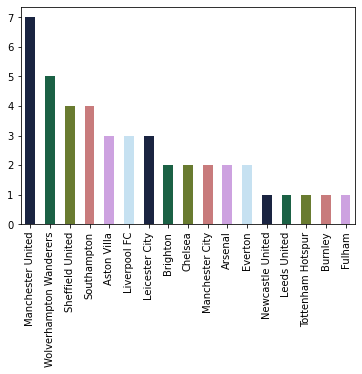

In [57]:
# Total de jugadores menores de 20 años en cada club

players_under_20 = epl[epl['Age'] < 20]

players_under_20['Club'].value_counts().plot(kind='bar', 
                                         color = sns.color_palette('cubehelix'))

plt.show(9)

In [58]:
# Jugadores menores de 20 años en  club Manchester United (7)
players_under_20[players_under_20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [59]:
# Jugadores menores de 20 años en  club Chelsea (7)
players_under_20[players_under_20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


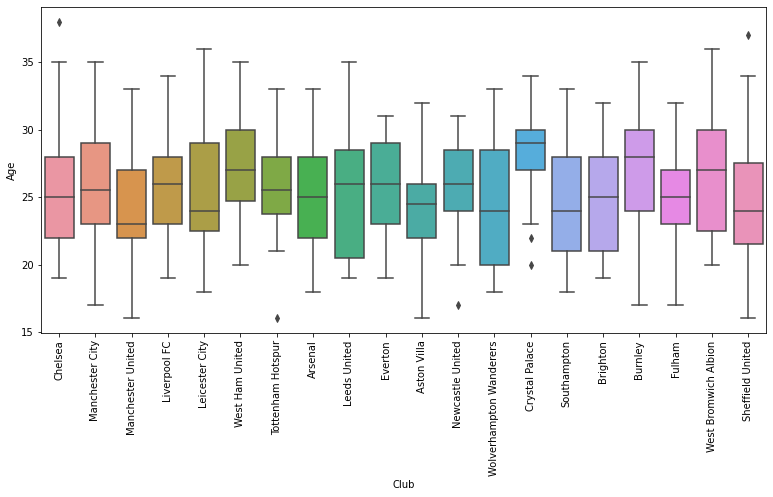

In [60]:
# Gráfico BoxPlot de la edad promedio de los jugadores de cada club
plt.figure(figsize=(13,6))
sns.boxplot(x = 'Club', y = 'Age', data = epl)
plt.xticks(rotation = 90)

plt.show()

In [64]:
# Clubs con Edades promedio mas altas
num_player = epl.groupby('Club').size()

data = (epl.groupby('Club')['Age'].sum()) / num_player

data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

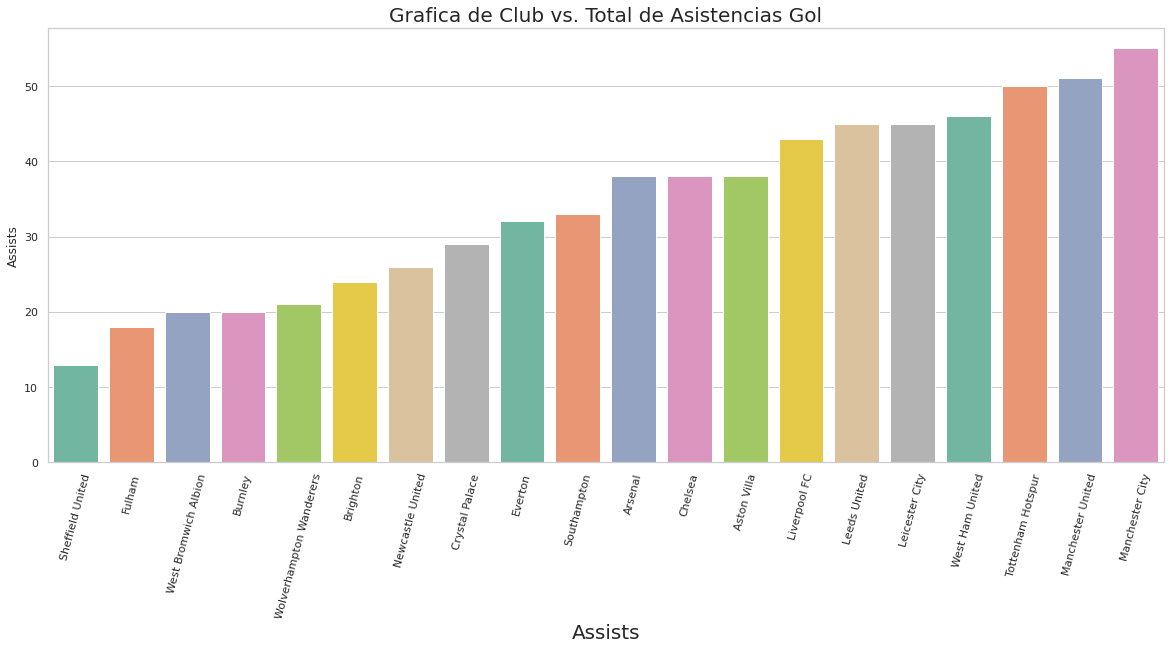

In [67]:
# Grafica de Total de asistencias gol por cada club
Assits_by_club = pd.DataFrame(epl.groupby('Club', as_index=False)['Assists'].sum())
sns.set(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data = Assits_by_club.sort_values(by='Assists'),palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_xlabel('Assists', fontsize=20)
plt.xticks(rotation=75)

plt.rcParams['figure.figsize']= (20,8)
plt.title('Grafica de Club vs. Total de Asistencias Gol', fontsize=20)
plt.show()

In [68]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinsPerMatch', 'GoalsPerMatch'],
      dtype='object')

In [69]:
# Jugadores top de 10 Asistencias Gol

top_10_assists = epl[['Name','Club','Assists','Matches']].nlargest(n=10, columns='Assists')

top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


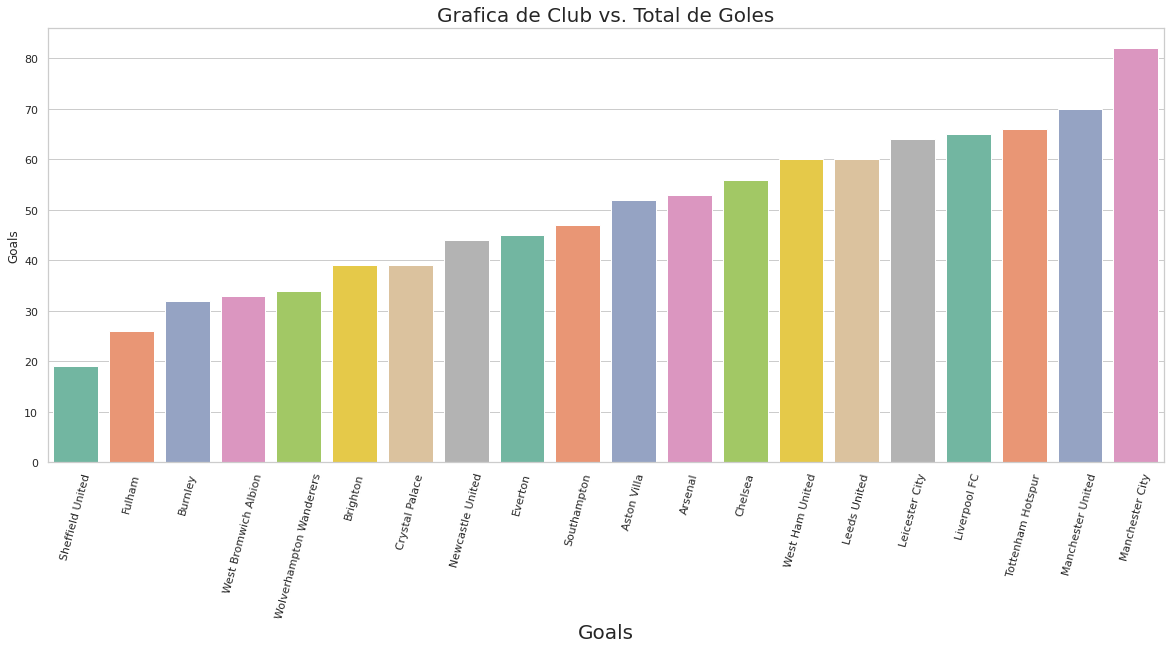

In [74]:
# Grafica del total de goles de cada club
Goals_by_clubs = pd.DataFrame(epl.groupby('Club', as_index=False)['Goals'].sum())
sns.set(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data= Goals_by_clubs.sort_values(by='Goals'),palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_xlabel('Goals', fontsize=20)
plt.xticks(rotation=75)

plt.rcParams['figure.figsize']= (20,8)
plt.title('Grafica de Club vs. Total de Goles', fontsize=20)
plt.show()

In [75]:
#Top 10 de  Goles por Jugador

top_10_goals = epl[['Name','Club','Goals','Matches']].nlargest(n=10, columns='Goals')

top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [76]:
# Top 10 Goles por partido
top_10_goals_matches = epl[['Name','GoalsPerMatch','Goals','Matches']].nlargest(n=10, columns='GoalsPerMatch')

top_10_goals_matches

,Name,GoalsPerMatch,Goals,Matches
162,Harry Kane,0.657143,23,35
81,Mohamed Salah,0.594595,22,37
307,Joe Willock,0.571429,8,14
145,Jesse Lingard,0.562500,9,16
175,Gareth Bale,0.550000,11,20
74,Anthony Elanga,0.500000,1,2
51,Bruno Fernandes,0.486486,18,37
237,Dominic Calvert-Lewin,0.484848,16,33
120,Kelechi Iheanacho,0.480000,12,25
92,Diogo Jota,0.473684,9,19


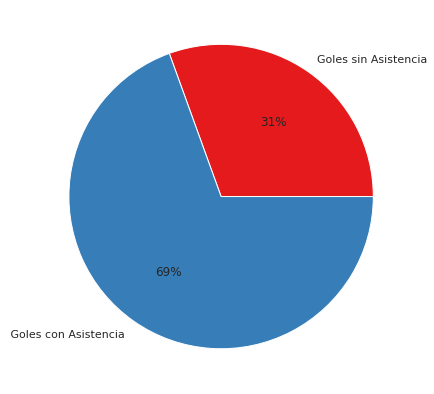

In [78]:
# Grafica Pi Chart - Goles con asistencia y Goles sin asistencia
plt.figure(figsize=(14,7))
assists = epl['Assists'].sum()
data = [Total_Goals - assists, assists]
nom = ['Goles sin Asistencia', ' Goles con Asistencia']
colores=sns.color_palette('Set1')
plt.pie(data, labels = nom, colors = colores, autopct = '%.0f%%')
plt.show()

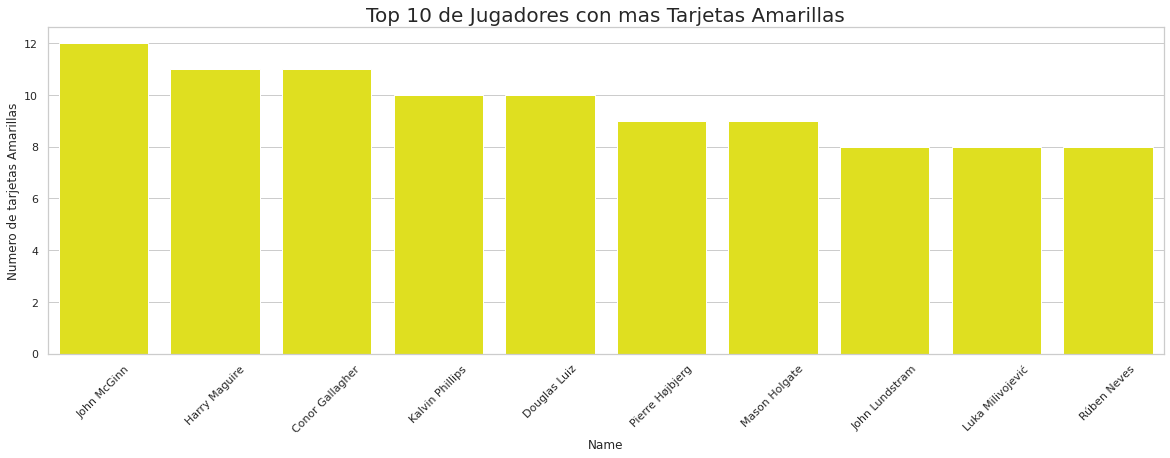

In [81]:
#Top 10 jugadores con mas tarjetas amarillas
epl_yellow = epl.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Top 10 de Jugadores con mas Tarjetas Amarillas', fontsize=20)
c = sns.barplot(x = epl_yellow['Name'], y = epl_yellow['Yellow_Cards'],
               label='Players', color='yellow')
plt.ylabel('Numero de tarjetas Amarillas')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c
plt.show()




## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>
    
    

[1] Guía de pandas oficial https://pandas.pydata.org/docs/user_guide/index.html

[2] Python Pandas Tutorial: A Complete Introduction for Beginners https://bit.ly/2AQMQld

[3] Guía para pandas https://pybonacci.org/2014/05/30/pandas-i/

[4] Dataset variados https://www.kaggle.com/datasets

[5] SimpliLearn https://www.youtube.com/c/SimplilearnOfficial


